In [2]:
!pip install music21;

In [0]:
#tiek ieimportētas nepieciešamās bibliotēkas
from music21 import converter, instrument, note, chord, stream
from google.colab import files
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'gray'
import numpy as np

In [0]:
Cmaj = {
  0 : 0, #C
  1 : 2, #D
  2 : 4, #E
  3 : 5, #F
  4 : 7, #G
  5 : 9, #A
  6 : 11 #B
}

In [0]:
#funkcija nošu un MIDI faila veidošana
def create_music (arr, fn, download=True, printMIDI=False):
  output_notes = []
  offset = 0
  
  #tiek veidoti nošu objekti katrai masīva vērtībai, nots augstumu nosakot vārdnīcas Cmaj palīdzību
  #parametrs quarterLenght apzīmē nots garumu ceturtdaļās
  #offset ir nots atskaņošanas laiks attiecībā pret sākumu
  for px in arr:
    new_note = note.Note(Cmaj[px], quarterLength=0.5)
    new_note.offset = offset
    new_note.storedInstrument = instrument.Piano()
    output_notes.append(new_note)
    
    #palielina offset katrā iterācijā, lai notis nepārklājas
    offset += 0.5

  #ģenerēto nošu informācija tiek ierakstīta failā    
  midi_stream = stream.Stream(output_notes)
  midi_stream.write('midi', fp='{name}_413atl.mid'.format(name=fn.split('.')[0]))

  #ģenerēto nošu izprintēšana
  if printMIDI == 1:
    for element in midi_stream:
      print(element.nameWithOctave, element.offset)

  #ģenerētā MIDI faila lejuplāde
  if download == 1:
    files.download('{name}_413atl.mid'.format(name=fn.split('.')[0]))
  return

In [6]:
#attēla augšupielāde
uploaded = files.upload()

Saving rose33-50.jpg to rose33-50.jpg


In [8]:
#tiek nolasīts faila nosaukums un pats attēls
filename = list(uploaded.keys())[0]
uploaded_picture=plt.imread(filename)

#tiek iegūts attēla augstums un platums
height = uploaded_picture.shape[0]
width = uploaded_picture.shape[1]

#attēls tiek apstaigāts pa pikseļu kolonnām, aprēķinot katrai vidējo krāsas vērtību (1 krāsas slānim)
#pie viena katrai vidējai vērtībai teik veika atlikuma iegūšana, dalot ar 7
uploaded_picture_bw_mod = []
for i in range(width):
  uploaded_picture_bw_mod.append(np.average(uploaded_picture[0:height,i:i+1,0]).round()%7)

#iegūtais vidējo vērtību masīvs tiek padots mūzikas ģenerēšanas fjai
create_music(uploaded_picture_bw_mod, filename, 1, 1)

E 0.0
F 0.5
G 1.0
F 1.5
G 2.0
E 2.5
F 3.0
G 3.5
D 4.0
A 4.5
F 5.0
B 5.5
G 6.0
G 6.5
A 7.0
C 7.5
B 8.0
A 8.5
F 9.0
C 9.5
C 10.0
E 10.5
G 11.0
F 11.5
F 12.0
F 12.5
A 13.0
F 13.5
A 14.0
A 14.5
C 15.0
A 15.5
B 16.0
D 16.5
G 17.0
C 17.5
C 18.0
G 18.5
B 19.0
G 19.5
D 20.0
B 20.5
G 21.0
D 21.5
C 22.0
C 22.5
C 23.0
B 23.5
E 24.0
G 24.5


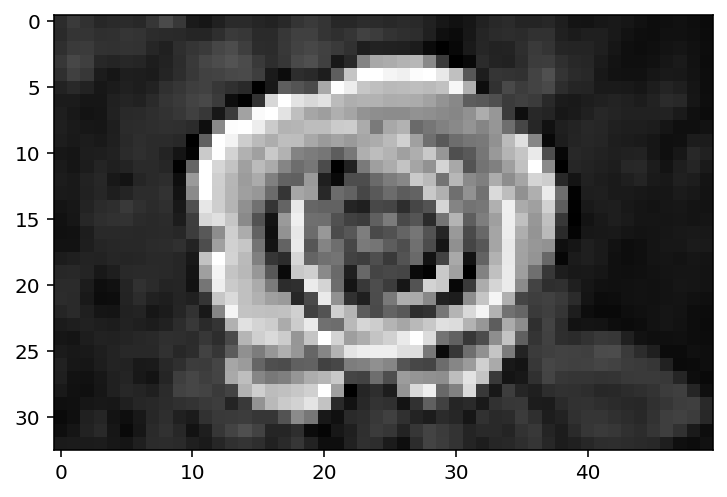

In [10]:
#iespēja attēlot attēlu, ja vajag
plt.imshow(uploaded_picture);